<a href="https://colab.research.google.com/github/Ridzzz0Alam/Data_Science/blob/main/DS_NaiveBayes_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load and explore the dataset

In [2]:
csv_path = "fake_or_real_news.csv"
df_raw = pd.read_csv(csv_path)
print("Columns:", df_raw.columns.tolist())
df_raw.head()

Columns: ['text', 'label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnam

/tmp/ipython-input-2967878535.py:2: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(csv_path)


,text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If the first two columns are indeed 'text' and 'label', keep only them. If the column names look slightly different, adjust this slice accordingly.

In [3]:
df = df_raw.iloc[:, :2]
df.columns = ["text", "label"]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6929 non-null   object
 1   label   6755 non-null   object
dtypes: object(2)
memory usage: 121.9+ KB
None


,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


Basic exploration

In [4]:
print("Number of rows:", len(df))
print("\nClass distribution:")
print(df["label"].value_counts())

Number of rows: 7795

Class distribution:
label
REAL                                                                            3161
FAKE                                                                            3154
 or naturalization or by jus sanguinis – inherited through ancestors/parents       3
 for example                                                                       2
 etc.                                                                              2
                                                                                ... 
 the Jewish settlers had built their houses higher up the mountain. Thus           1
 Tel Aviv–Jaffa                                                                    1
 the Haganah attacked the village of Khisas at night                               1
 and then depart. [61]                                                             1
 are remarkably like those of Nazi Germany.” [81] An elderly man and a girl        1
Name: count, Leng

Quick look at some examples from each class

In [5]:
print("\nSample FAKE article:\n", df[df["label"] == "FAKE"]["text"].iloc[0][:500], "...")
print("\nSample REAL article:\n", df[df["label"] == "REAL"]["text"].iloc[0][:500], "...")


Sample FAKE article:
 Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now  ...

Sample REAL article:
 U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.

Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Mini

2. Preprocess the data
    - Handle missing values
    - Ensure labels are clean

In [6]:
df = df.dropna(subset=["text", "label"])
df["label"] = df["label"].str.strip()
print("Unique labels:", df["label"].unique())

Unique labels: ['FAKE' 'REAL' 'filled with fear and insecurity'
 'by criminal and congressional investigations'
 'however intimidating the process and long the lines. For Americans who may feel unmoved or unwilling to vote for Mrs. Clinton'
 'and who better to do it than an outsider beholden to neither political party? If only that reform possibility didn’t arrive as a flawed personality who has few convictions and knows little about the world.”'
 'Hugh Naylor writes. And the impending assault represents an “intensified international effort” to increase pressure on the extremist group as it loses control of territory in the countries.'
 'Wesley Lowery and Steven Rich)'
 'clap and whoop as [KrisAnne] Hall takes the stage in the ballroom of a suburban Minnesota hotel … Hall'
 'higher spending by the state and wide-scale efforts to lift the working poor. … It is on the ballot in three states: Californians are set to essentially make permanent an income tax surcharge on millionaires in ord

3. Train/Test Split

In [8]:
df = df[df['label'].isin(['FAKE', 'REAL'])]
X = df["text"].values
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 5052
Test size: 1263


4. Build Naive Bayes Model (with TF-IDF)

In [9]:
model = make_pipeline(
    TfidfVectorizer(
        stop_words='english',
        max_df=0.9,
        min_df=5
    ),
    MultinomialNB()
)

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

5. Evaluate Model Performance

In [10]:
# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
cm_df = pd.DataFrame(cm, index=["FAKE_true", "REAL_true"], columns=["FAKE_pred", "REAL_pred"])
print("\nConfusion Matrix:")
print(cm_df)

# Classification Report: precision, recall, F1
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Test Accuracy: 0.8963

Confusion Matrix:
           FAKE_pred  REAL_pred
FAKE_true        539         92
REAL_true         39        593

Classification Report:
              precision    recall  f1-score   support

        FAKE     0.9325    0.8542    0.8916       631
        REAL     0.8657    0.9383    0.9005       632

    accuracy                         0.8963      1263
   macro avg     0.8991    0.8962    0.8961      1263
weighted avg     0.8991    0.8963    0.8961      1263



6. Interpret Results
  Plot confusion matrix for visualization

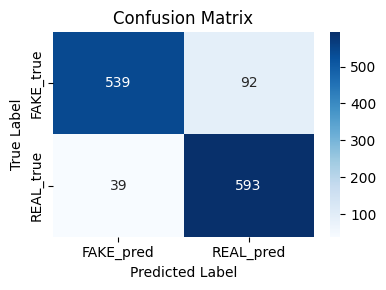

In [11]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()